In [130]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (45.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and di

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 그래프 그리기 라이브러리를 불러옵니다. 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

plt.rc('font', family='NanumBarunGothic') 

In [2]:
os.chdir("/content/drive/MyDrive/data/final_project")

In [3]:
subway_2016_list = sorted(os.listdir())[:12]
subway_2017_list = sorted(os.listdir())[12:24]
subway_2018_list = sorted(os.listdir())[24:36]
subway_2019_list = sorted(os.listdir())[36:48]
subway_2020_list = sorted(os.listdir())[48:57]

In [4]:
# 데이터 로드
subway_2016 = pd.DataFrame()
subway_2017 = pd.DataFrame()
subway_2018 = pd.DataFrame()
subway_2019 = pd.DataFrame()
subway_2020 = pd.DataFrame()

for f in subway_2016_list:
    tmp = pd.read_csv(f)
    subway_2016 = subway_2016.append(tmp)

for f in subway_2017_list:
    tmp = pd.read_csv(f)
    subway_2017 = subway_2017.append(tmp)

for f in subway_2018_list:
    tmp = pd.read_csv(f)
    subway_2018 = subway_2018.append(tmp)
    
for f in subway_2019_list:
    tmp = pd.read_csv(f)
    subway_2019 = subway_2019.append(tmp)
    
for f in subway_2020_list:
    tmp = pd.read_csv(f)
    subway_2020 = subway_2020.append(tmp)

In [5]:
# 데이터 로드
holiday_table = pd.read_csv("holiday_table.csv", index_col=0)
holiday_table_2020 = pd.read_csv("holiday_table_2020.csv", index_col=0)
rainfall = pd.read_csv('rainfall.csv')
rainfall_2020 = pd.read_csv('rainfall_2020.csv')
temperature = pd.read_csv('temperature.csv')
temperature_2020 = pd.read_csv("temperature_2020.csv")
wind = pd.read_csv("wind.csv")
wind_2020 = pd.read_csv("wind_2020.csv")

temperature_2020 = temperature_2020.drop(temperature_2020[temperature_2020['일시'].isnull()].index)
temperature_2020 = temperature_2020.drop(['\t\t지점번호', '지점명', '\t최고기온시각', '최저기온시각'], axis=1)
temperature_2020.columns = ['일시', '평균기온', '최고기온','최저기온']
temperature_2020['일시'] = pd.to_datetime(temperature_2020['일시'], format='%Y-%m-%d')
temperature_2020['일시'] = temperature_2020['일시'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))

holiday_table = pd.concat([holiday_table, holiday_table_2020], axis=0)
rainfall = pd.concat([rainfall, rainfall_2020], axis=0)
temperature = pd.concat([temperature, temperature_2020], axis=0)
wind = pd.concat([wind, wind_2020], axis=0)

In [6]:
# 변수 선택
subway_total = pd.concat([subway_2016, subway_2017, subway_2018, subway_2019, subway_2020])
subway_total = subway_total.drop(['하차총승객수', '등록일자'], axis=1)
holiday_table = holiday_table.drop(['dateKind', 'seq'], axis=1)
rainfall = rainfall.drop(['\t지점번호', '지점명', '1시간최다강수량(mm)', '1시간최다강수량시각'], axis=1)
wind = wind.drop(['\t\t지점번호', '지점명', '최대풍속풍향(deg)','\t최대풍속시각', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)', '\t최대순간풍속시각'], axis=1)

# 변수명 정리
holiday_table.columns = ['날짜명', '휴일여부', 'locdate']
rainfall.columns = ['일시', '강수량']
wind.columns = ['일시', '평균풍속', '최대풍속']

# 원인모를 Null값 제거
rainfall = rainfall.loc[rainfall['일시'].dropna().index, :]
rainfall = rainfall.drop(rainfall[rainfall['일시'].isnull()].index, axis=0)
wind = wind.drop(wind[wind['일시'].isnull()].index, axis=0)

In [7]:
# 시계열데이터 통일
subway_total['사용일자'] = pd.to_datetime(subway_total['사용일자'] , format='%Y%m%d')
holiday_table['locdate'] = pd.to_datetime(holiday_table['locdate'], format='%Y%m%d')
temperature['일시'] = pd.to_datetime(temperature['일시'], format='%Y%m%d%H%M%S')
rainfall['일시'] = pd.to_datetime(rainfall['일시'], format='%Y-%m-%d')
wind['일시'] = pd.to_datetime(wind['일시'], format='%Y-%m-%d')

subway_total['사용일자'] = subway_total['사용일자'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))
holiday_table['locdate'] = holiday_table['locdate'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))
temperature['일시'] = temperature['일시'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))
rainfall['일시'] = rainfall['일시'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))
wind['일시'] = wind['일시'].map(lambda x: x.strftime("%Y%m%d%H%M%S"))

In [8]:
holiday_table.isnull().sum()

날짜명        0
휴일여부       0
locdate    0
dtype: int64

In [9]:
temperature.isnull().sum()

일시      0
평균기온    0
최고기온    0
최저기온    0
dtype: int64

In [10]:
rainfall.isnull().sum()

일시        0
강수량    1427
dtype: int64

In [11]:
wind.isnull().sum()

일시      0
평균풍속    3
최대풍속    2
dtype: int64

In [12]:
rainfall['강수량'] = rainfall['강수량'].fillna(0)
rainfall.isnull().sum()

일시     0
강수량    0
dtype: int64

In [13]:
wind[wind['평균풍속'].isnull()]

,일시,평균풍속,최대풍속
652,20171014000000,NaN,NaN
704,20171205000000,NaN,NaN
705,20171206000000,NaN,3.5


In [14]:
wind_1014 = wind[(wind['일시'] == '20161014000000') | (wind['일시'] == '20181014000000') | (wind['일시'] == '20191014000000')]
wind_1024 = wind[(wind['일시'] == '20171024000000') | (wind['일시'] == '20181024000000') | (wind['일시'] == '20191024000000')]
wind_1025 = wind[(wind['일시'] == '20171025000000') | (wind['일시'] == '20181025000000') | (wind['일시'] == '20191025000000')]
wind_1205 = wind[(wind['일시'] == '20161205000000') | (wind['일시'] == '20181205000000') | (wind['일시'] == '20191205000000')]
wind_1206 = wind[(wind['일시'] == '20161206000000') | (wind['일시'] == '20181206000000') | (wind['일시'] == '20191206000000')]

wind.loc[wind[wind['일시'] == '20171014000000'].index, '평균풍속'] = wind_1014.mean()['평균풍속']
wind.loc[wind[wind['일시'] == '20171014000000'].index, '최대풍속'] = wind_1014.mean()['최대풍속']

wind.loc[wind[wind['일시'] == '20171205000000'].index, '평균풍속'] = wind_1205.mean()['평균풍속']
wind.loc[wind[wind['일시'] == '20171205000000'].index, '최대풍속'] = wind_1205.mean()['최대풍속']

wind.loc[wind[wind['일시'] == '20171206000000'].index, '평균풍속'] = wind_1206.mean()['평균풍속']

missing_wind_date = pd.DataFrame([['20161024000000', wind_1024.mean()['평균풍속'] , wind_1024.mean()['최대풍속']], ['20161025000000', wind_1025.mean()['평균풍속'], wind_1025.mean()['최대풍속']]], columns = ['일시', '평균풍속', '최대풍속'])

wind = pd.concat([wind,missing_wind_date], axis=0)

wind = wind.sort_values(by='일시')
wind.reset_index(inplace=True)

wind.isnull().sum()

index    0
일시       0
평균풍속     0
최대풍속     0
dtype: int64

In [15]:
# 추가데이터 합치기
subway_total_all = subway_total.merge(holiday_table, how = 'left', left_on = '사용일자', right_on = 'locdate')
subway_total_all = subway_total_all.merge(temperature, how = 'left', left_on = '사용일자', right_on = '일시')
subway_total_all = subway_total_all.merge(rainfall, how = 'left', left_on = '사용일자', right_on = '일시')
subway_total_all = subway_total_all.merge(wind, how = 'left', left_on = '사용일자', right_on = '일시')

In [16]:
# 변수 정리
subway_total_all = subway_total_all.drop(['locdate', '일시_x', '일시_y', '일시'], axis=1)

subway_total_all['사용일자'] = pd.to_datetime(subway_total_all['사용일자'], format='%Y%m%d%H%M%S')

In [17]:
# 파생변수 생성
subway_total_all['year'] = subway_total_all['사용일자'].dt.year
subway_total_all['month'] = subway_total_all['사용일자'].dt.month
subway_total_all['day'] = subway_total_all['사용일자'].dt.day
subway_total_all['week'] = subway_total_all['사용일자'].dt.weekofyear
subway_total_all['date'] = subway_total_all['사용일자'].dt.day_name()

In [18]:
subway_total_all['날짜명'] = subway_total_all['날짜명'].fillna("N")
subway_total_all['휴일여부'] = subway_total_all['휴일여부'].fillna("N")

In [19]:
subway_total_all

,사용일자,노선명,역명,승차총승객수,날짜명,휴일여부,평균기온,최고기온,최저기온,강수량,index,평균풍속,최대풍속,year,month,day,week,date
0,2016-01-01,4호선,동작,1213.0,신정,Y,1.2,4.0,-3.3,0.0,0,1.6,3.5,2016,1,1,53,Friday
1,2016-01-01,4호선,동작,1213.0,신정,Y,1.2,4.0,-3.3,0.0,0,1.6,3.5,2016,1,1,53,Friday
2,2016-01-01,4호선,이촌,3365.0,신정,Y,1.2,4.0,-3.3,0.0,0,1.6,3.5,2016,1,1,53,Friday
3,2016-01-01,4호선,이촌,3365.0,신정,Y,1.2,4.0,-3.3,0.0,0,1.6,3.5,2016,1,1,53,Friday
4,2016-01-01,4호선,신용산,5746.0,신정,Y,1.2,4.0,-3.3,0.0,0,1.6,3.5,2016,1,1,53,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328780,2020-09-30,2호선,뚝섬,5557.0,추석,Y,19.6,25.7,16.2,38.3,273,1.7,4.1,2020,9,30,40,Wednesday
1328781,2020-09-30,2호선,한양대,1870.0,추석,Y,19.6,25.7,16.2,38.3,273,1.7,4.1,2020,9,30,40,Wednesday
1328782,2020-09-30,2호선,한양대,1870.0,추석,Y,19.6,25.7,16.2,38.3,273,1.7,4.1,2020,9,30,40,Wednesday
1328783,2020-09-30,2호선,왕십리(성동구청),6817.0,추석,Y,19.6,25.7,16.2,38.3,273,1.7,4.1,2020,9,30,40,Wednesday


In [20]:
holiday_total = subway_total_all[(subway_total_all['date'] == 'Saturday') | (subway_total_all['date'] == 'Sunday')].index.tolist()

subway_total_all.loc[holiday_total,'휴일여부'] = 'Y'

weekend_index_total = subway_total_all[(subway_total_all['날짜명'] == 'N') & (subway_total_all['휴일여부'] == 'Y')].index.tolist()

subway_total_all.loc[weekend_index_total, '날짜명'] = '주말'

weekday_index_total = subway_total_all[subway_total_all['날짜명'] == 'N'].index.tolist()

subway_total_all.loc[weekday_index_total, '날짜명'] = '평일'

In [21]:
line_list = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

index_line = []

[index_line.append(i) for i, v in enumerate(subway_total_all['노선명']) if v in line_list]

subway_total_select = subway_total_all.loc[index_line, :]
subway_total_select = subway_total_select.reset_index(drop = True)

In [22]:
subway_total_select.isnull().sum()

사용일자         0
노선명          0
역명           0
승차총승객수       0
날짜명          0
휴일여부         0
평균기온         0
최고기온         0
최저기온         0
강수량       1204
index        0
평균풍속         0
최대풍속         0
year         0
month        0
day          0
week         0
date         0
dtype: int64

In [23]:
subway_total_select['강수량'] = subway_total_select['강수량'].fillna(0)
subway_total_select.isnull().sum()

사용일자      0
노선명       0
역명        0
승차총승객수    0
날짜명       0
휴일여부      0
평균기온      0
최고기온      0
최저기온      0
강수량       0
index     0
평균풍속      0
최대풍속      0
year      0
month     0
day       0
week      0
date      0
dtype: int64

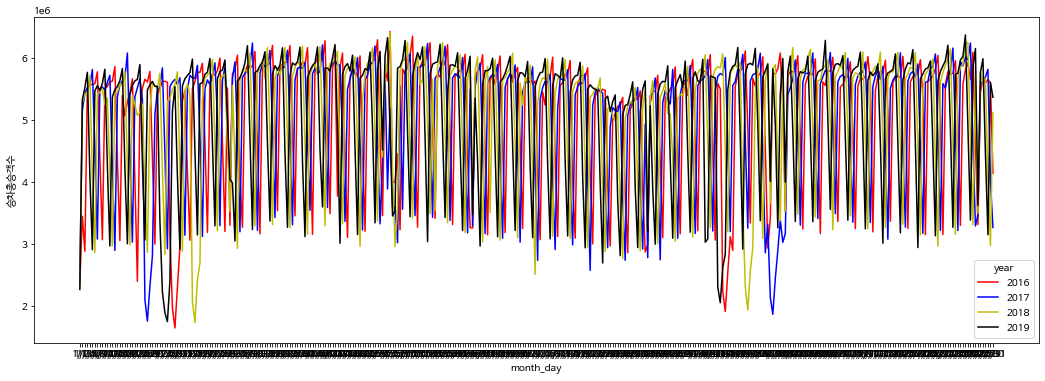

In [24]:
subway_total_select = subway_total_select.drop_duplicates()
s_total = subway_total_select.pivot_table(index=['사용일자', 'year', 'month', 'day'], values = '승차총승객수', aggfunc='sum')
s_total.reset_index(inplace=True)
s_total = s_total.drop(s_total[s_total['year'] == 2020].index, axis = 0)
s_total = s_total.astype({"month":"str", "day":"str"})

s_total['month_day'] = s_total['month'] + "/" + s_total['day']

plt.figure(figsize=(18,6))

sns.lineplot(s_total['month_day'], s_total['승차총승객수'], hue=s_total['year'], palette=['r','b','y','k'])

## 예측 데이터(2019년도 데이터와 가장 가까운 2018년도 데이터를 기준으로 EDA 진행

In [25]:
subway_2018_select = subway_total_select[subway_total_select['year'] == 2018]

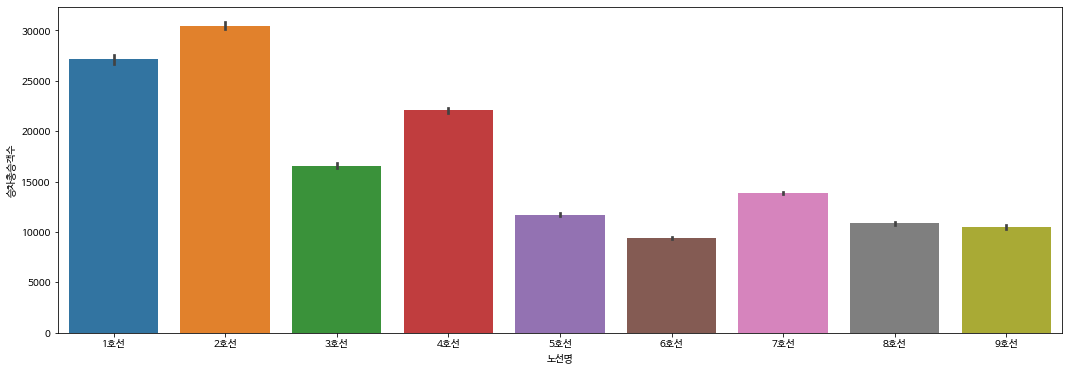

In [26]:
plt.figure(figsize=(18,6))

plot_order = sorted(subway_2018_select['노선명'].unique())

sns.barplot(subway_2018_select['노선명'], subway_2018_select['승차총승객수'], order=plot_order)

([<matplotlib.patches.Wedge at 0x7ffa36e6e128>,
 [Text(-0.18537624084721016, 1.0842673329623822, '1호선'),
  Text(-1.0568099544296559, 0.3052093055894408, '2호선'),
  Text(-0.576154396871304, -0.9370411468905002, '3호선'),
  Text(0.17139173040983735, -1.086565632967987, '4호선'),
  Text(0.8533787015290856, -0.6940783758168325, '5호선'),
  Text(1.0956724040255124, -0.09747811578479985, '6호선'),
  Text(0.9247026403515181, 0.5957558450631696, '7호선'),
  Text(0.47138367071055726, 0.9938799902339523, '8호선'),
  Text(0.17945681519080636, 1.0852627568849733, '9호선')])

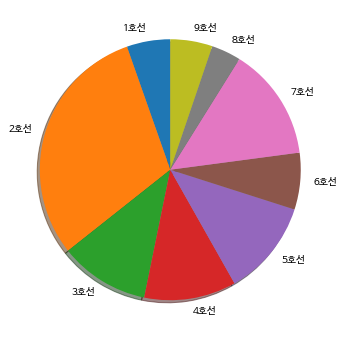

In [27]:
a = pd.DataFrame(subway_2018_select.groupby("노선명")['승차총승객수'].sum())

plt.figure(figsize=(18,6))

plt.pie(a['승차총승객수'], labels=a.index, shadow=True, startangle=90)

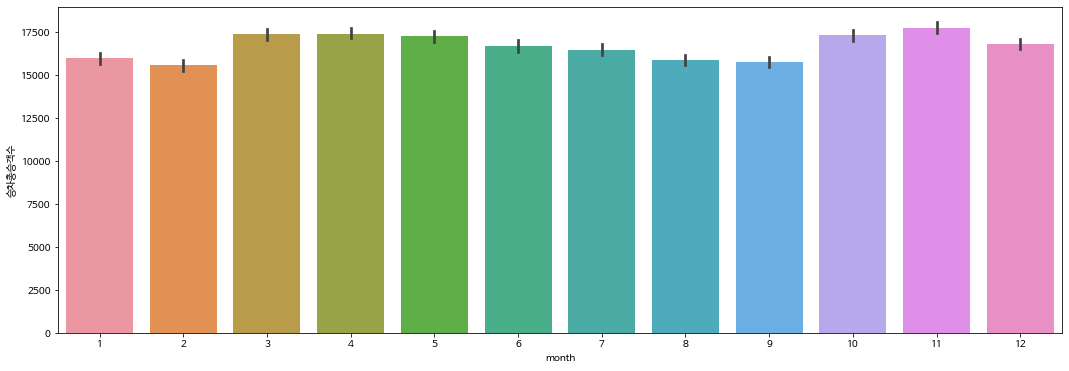

In [28]:
plt.figure(figsize=(18,6))

plot_order = sorted(subway_2018_select['month'].unique())

sns.barplot(subway_2018_select['month'], subway_2018_select['승차총승객수'], order=plot_order)

<Figure size 1296x432 with 0 Axes>

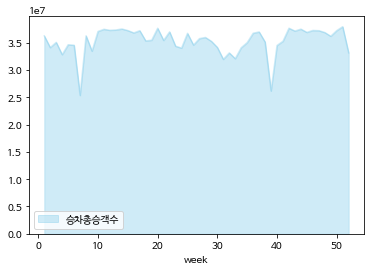

In [29]:
plt.figure(figsize=(18,6))

subway_2018_select.pivot_table(index=['week'], values=['승차총승객수'], aggfunc='sum').plot(kind='area', color='skyblue', alpha=0.4)

# sns.barplot(subway_2018_select['week'], subway_2018_select['승차총승객수'], order=plot_order)
# plt.stackplot(subway_2018_select['week'], subway_2018_select['승차총승객수'])
# plt.fill_between(subway_2018_select['week'], subway_2018_select['승차총승객수'], color='skyblue', alpha=0.4)

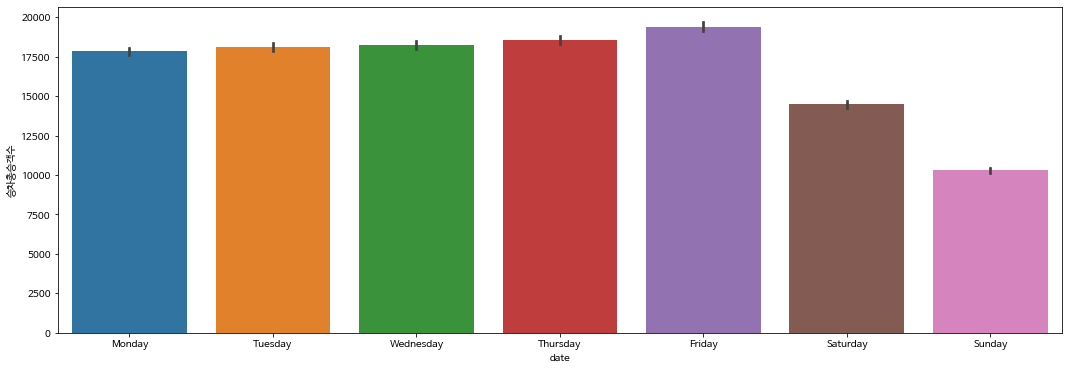

In [30]:
plt.figure(figsize=(18,6))

plot_order = subway_2018_select['date'].unique()

sns.barplot(subway_2018_select['date'], subway_2018_select['승차총승객수'], order=plot_order)


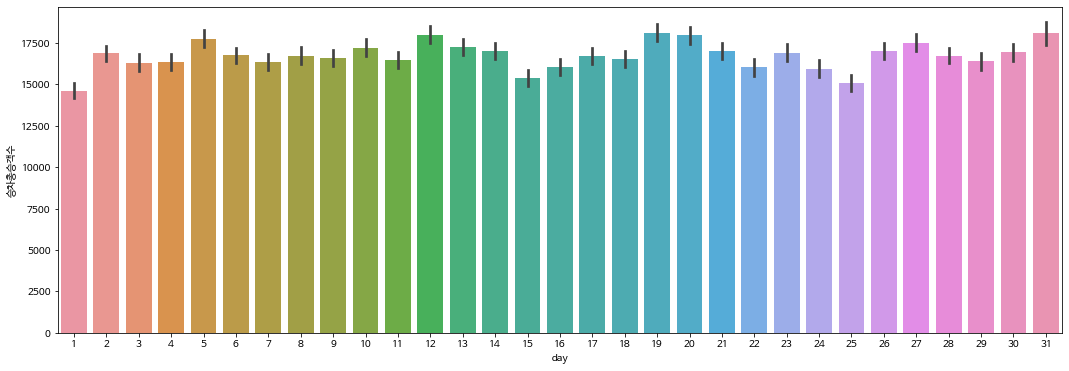

In [31]:
plt.figure(figsize=(18,6))

plot_order = subway_2018_select['day'].unique()

sns.barplot(subway_2018_select['day'], subway_2018_select['승차총승객수'], order=plot_order)
# sns.boxplot(subway_2018_select['date'], subway_2018_select['승차총승객수'], order=plot_order)


In [32]:
s_2 = subway_2018_select.pivot_table(index=['사용일자'], values = ['승차총승객수', '평균기온', '최고기온', '최저기온', '강수량', '평균풍속', '최대풍속'], aggfunc=['sum', 'max'])

s_2.reset_index(inplace=True)

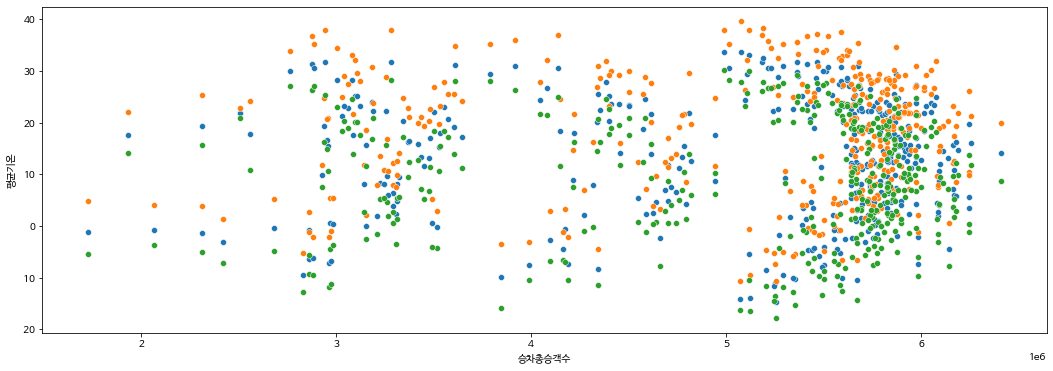

In [33]:
plt.figure(figsize=(18,6))
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['평균기온'])
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['최고기온'])
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['최저기온'])

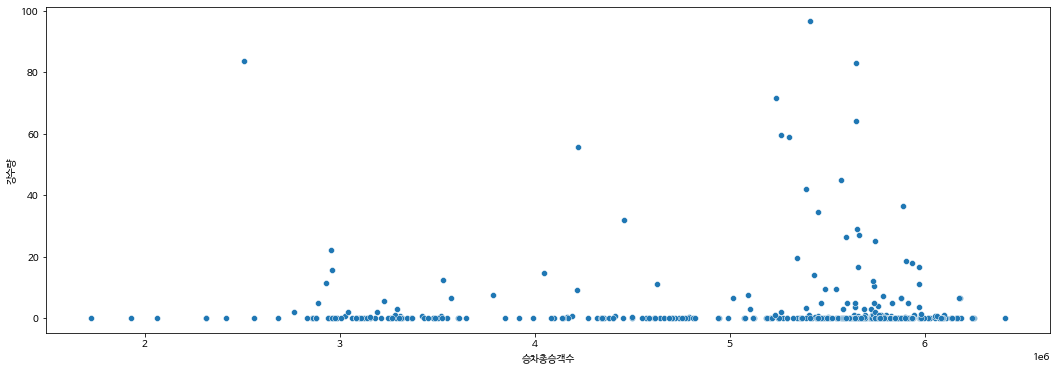

In [34]:
plt.figure(figsize=(18,6))
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['강수량'])

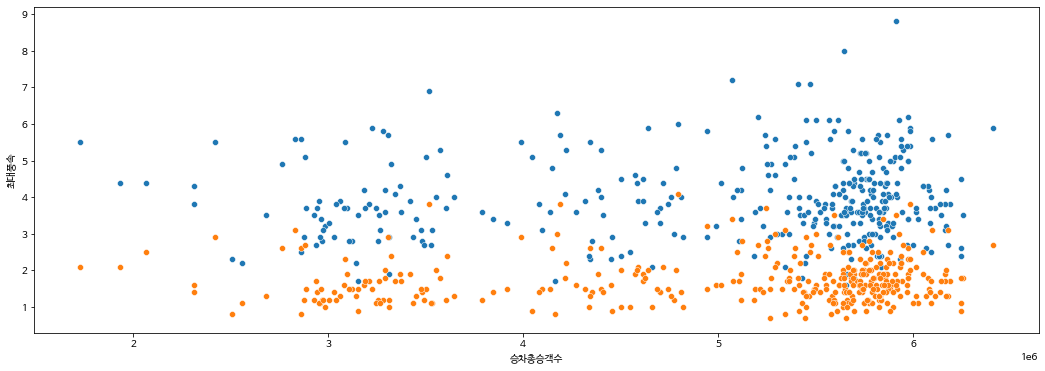

In [35]:
plt.figure(figsize=(18,6))
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['최대풍속'])
sns.scatterplot(s_2['sum']['승차총승객수'], s_2['max']['평균풍속'])

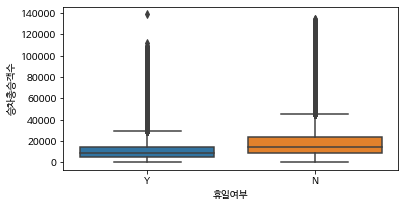

In [36]:
plt.figure(figsize=(6,3))
sns.boxplot(subway_2018_select['휴일여부'], subway_2018_select['승차총승객수'])

# 파생변수 생성

In [37]:
date_table = subway_total_select.pivot_table(index=['사용일자', '날짜명', '휴일여부', 'date'], values='승차총승객수', aggfunc='sum')
date_table = date_table.reset_index()

In [38]:
holiday_count = [0] * date_table.shape[0]
holiday = date_table['휴일여부']

n = 1

for i in range(date_table.shape[0]):
    if holiday[i] == 'Y':
        holiday_count[i] = n
        n += 1
    else:
        n = 1

date_table['누적휴일'] = holiday_count

In [39]:
date_table

,사용일자,날짜명,휴일여부,date,승차총승객수,누적휴일
0,2016-01-01,신정,Y,Friday,2382815.0,1
1,2016-01-02,주말,Y,Saturday,3444352.0,2
2,2016-01-03,주말,Y,Sunday,2880147.0,3
3,2016-01-04,평일,N,Monday,5506508.0,0
4,2016-01-05,평일,N,Tuesday,5574752.0,0
...,...,...,...,...,...,...
1730,2020-09-26,주말,Y,Saturday,2764305.0,1
1731,2020-09-27,주말,Y,Sunday,1862679.0,2
1732,2020-09-28,평일,N,Monday,4286805.0,0
1733,2020-09-29,평일,N,Tuesday,4193076.0,0


In [40]:
holiday_count = [0] * date_table.shape[0]
holiday_name = date_table['날짜명']
holiday = date_table['휴일여부']

for i in range(date_table.shape[0]-1):
    if (holiday_name[i] == '설날') | (holiday_name[i] == '추석'):
        holiday_count[i] = 1
	
        if i == date_table.shape[0]:
            break
	
        for j in range(1, date_table['누적휴일'][i]):
            holiday_count[i-j] = 1
	
        for k in range(1, 10):
            if holiday[i+k] == "Y":
                holiday_count[i+k] = 1
            else:
                break
		
holiday_count[-1] = 1

date_table['명절여부'] = holiday_count

In [41]:
line_pivot = subway_total_select.pivot_table(index=['노선명','역명'], values=['승차총승객수'], aggfunc='sum')
line_pivot = line_pivot.reset_index()

stations = line_pivot['역명'].unique()
station_dic = {}

for station in stations:
    tmp = line_pivot[line_pivot['역명'] == station]
    
    tmp_station = tmp['노선명'].unique()
    
    station_dic[station] = len(tmp_station)
    
station_table = pd.DataFrame([station_dic], index = ['환승노선'])
station_col = station_table.columns

station_table = station_table.T
station_table['역명'] = station_col

station_table = station_table.reset_index(drop=True)

In [42]:
subway_total_select = subway_total_select.merge(date_table, on = ['사용일자', '날짜명', '휴일여부', 'date'], how = 'left')
subway_total_select = subway_total_select.merge(station_table, on ='역명', how='left')

subway_total_select = subway_total_select.drop("승차총승객수_y", axis=1)
subway_total_select.columns = ['사용일자', '노선명', '역명', '승차총승객수', '날짜명', '휴일여부', '평균기온', '최고기온', '최저기온',
       '강수량', 'index', '평균풍속', '최대풍속', 'year', 'month', 'day', 'week', 'date',
       '누적휴일', '명절여부', '환승노선']

(array([2.1880e+03, 6.4600e+02, 1.6120e+03, 3.3960e+03, 5.0500e+03,
        4.9370e+03, 5.4100e+03, 5.8250e+03, 7.0120e+03, 8.1830e+03,
        8.1630e+03, 7.7500e+03, 8.1450e+03, 9.9010e+03, 8.7300e+03,
        8.3120e+03, 8.6210e+03, 9.3630e+03, 9.6010e+03, 8.3620e+03,
        8.5390e+03, 8.2460e+03, 8.9300e+03, 9.3480e+03, 1.0182e+04,
        9.8740e+03, 9.0290e+03, 8.4330e+03, 8.7240e+03, 8.7490e+03,
        8.2000e+03, 7.8260e+03, 7.6730e+03, 7.6520e+03, 7.6830e+03,
        7.0860e+03, 6.8310e+03, 6.3660e+03, 5.8510e+03, 5.7850e+03,
        5.8750e+03, 6.3940e+03, 6.3190e+03, 5.6970e+03, 5.1060e+03,
        5.0990e+03, 5.2750e+03, 5.5610e+03, 5.3870e+03, 5.4180e+03,
        5.3760e+03, 5.1160e+03, 4.4940e+03, 4.1480e+03, 3.8180e+03,
        4.1350e+03, 4.2410e+03, 4.0340e+03, 3.8000e+03, 3.6460e+03,
        3.4940e+03, 3.4750e+03, 3.3350e+03, 3.3770e+03, 3.1220e+03,
        3.1680e+03, 2.8340e+03, 2.7900e+03, 2.7370e+03, 2.7950e+03,
        2.7790e+03, 2.5420e+03, 2.3750e+03, 2.12

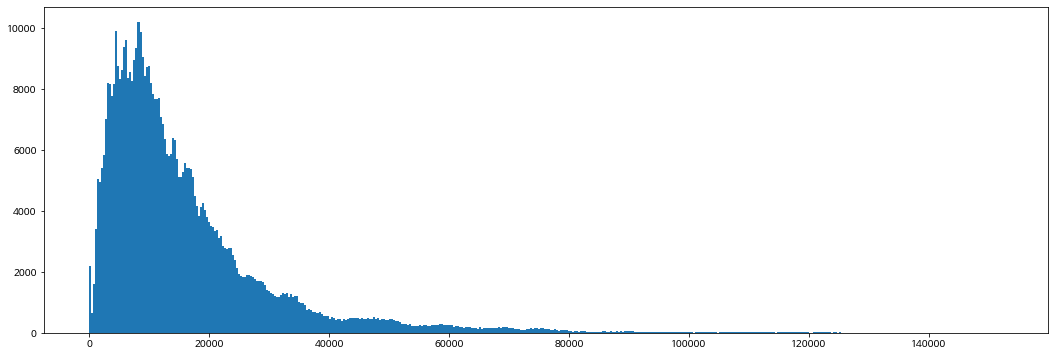

In [43]:
plt.figure(figsize=(18,6))
plt.hist(subway_total_select['승차총승객수'], bins='fd')

(array([1.118e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.670e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.830e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.010e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.500e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.900e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

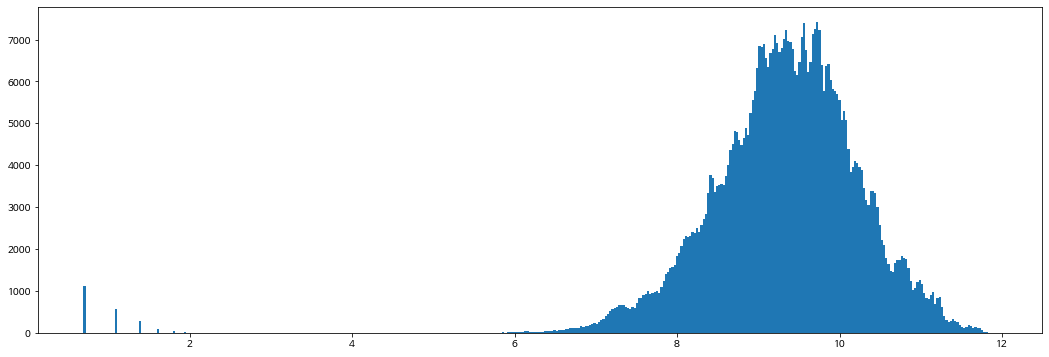

In [44]:
plt.figure(figsize=(18,6))

subway_total_select['승차총승객수_log'] = np.log1p(subway_total_select['승차총승객수'])
plt.hist(subway_total_select['승차총승객수_log'], bins='fd')

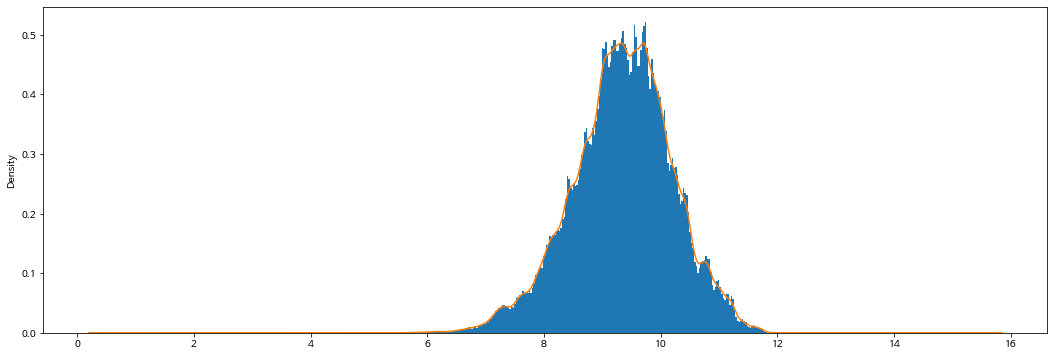

In [45]:
outlier = subway_total_select[subway_total_select['승차총승객수'] < 20]['승차총승객수'].index.to_list()
subway_total_select = subway_total_select.drop(outlier,axis=0)

plt.figure(figsize=(18,6))

plt.hist(subway_total_select['승차총승객수_log'], bins='fd', density=True)
subway_total_select['승차총승객수_log'].plot.density()

In [46]:
# 학습데이터, 평가데이터로 분류
subway_train = subway_total_select[(subway_total_select['year'] == 2016) | (subway_total_select['year'] == 2017) | (subway_total_select['year'] == 2018)]

subway_test = subway_total_select[(subway_total_select['year'] == 2019)]

subway_experiment = subway_total_select[(subway_total_select['year'] == 2020)]

In [47]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

def print_pval(var, pval):
    print(f"변수 {var}, ANOVA 검정 P-value : {pval:.4f}")
    
    if pval > 0.05:
        print("집단 간 평균의 차이 X(유의미 X)")
    else:
        print("집단 간 평균의 차이 O(유의미)")

In [48]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['year'] == 2016, '승차총승객수_log'], subway_train.loc[subway_train['year'] == 2017, '승차총승객수_log'], subway_train.loc[subway_train['year'] == 2018, '승차총승객수_log'])
print_pval("year", pval)

변수 year, ANOVA 검정 P-value : 0.1757
집단 간 평균의 차이 X(유의미 X)


In [49]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['month'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 2, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 3, '승차총승객수_log'],
                      subway_train.loc[subway_train['month'] == 4, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 5, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 6, '승차총승객수_log'],
                      subway_train.loc[subway_train['month'] == 7, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 8, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 9, '승차총승객수_log'],
                      subway_train.loc[subway_train['month'] == 10, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 11, '승차총승객수_log'], subway_train.loc[subway_train['month'] == 12, '승차총승객수_log'])

print_pval("month", pval)

변수 month, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [50]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['day'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 2, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 3, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 4, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 5, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 6, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 7, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 8, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 9, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 10, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 11, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 12, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 13, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 14, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 15, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 16, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 17, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 18, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 19, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 20, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 21, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 22, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 23, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 24, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 25, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 26, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 27, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 28, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 29, '승차총승객수_log'], subway_train.loc[subway_train['day'] == 30, '승차총승객수_log'],
                      subway_train.loc[subway_train['day'] == 31, '승차총승객수_log'])

print_pval("day", pval)

변수 day, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [51]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['week'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 2, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 3, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 4, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 5, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 6, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 7, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 8, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 9, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 10, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 11, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 12, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 13, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 14, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 15, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 16, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 17, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 18, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 19, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 20, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 21, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 22, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 23, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 24, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 25, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 26, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 27, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 28, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 29, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 30, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 31, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 32, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 33, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 34, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 35, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 36, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 37, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 38, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 39, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 40, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 41, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 42, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 43, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 44, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 45, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 46, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 47, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 48, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 49, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 50, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 51, '승차총승객수_log'],
                      subway_train.loc[subway_train['week'] == 52, '승차총승객수_log'], subway_train.loc[subway_train['week'] == 53, '승차총승객수_log'])

print_pval("week", pval)

변수 week, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [52]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['date'] == 'Monday', '승차총승객수_log'], subway_train.loc[subway_train['date'] == 'Tuesday', '승차총승객수_log'], subway_train.loc[subway_train['date'] == 'Wednesday', '승차총승객수_log'],
                      subway_train.loc[subway_train['date'] == "Thursday", '승차총승객수_log'], subway_train.loc[subway_train['date'] == 'Friday', '승차총승객수_log'], subway_train.loc[subway_train['date'] == 'Saturday', '승차총승객수_log'],
                      subway_train.loc[subway_train['date'] == "Sunday", '승차총승객수_log'])

print_pval("date", pval)

변수 date, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [53]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['노선명'] == '1호선', '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '2호선', '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '3호선', '승차총승객수_log'],
                      subway_train.loc[subway_train['노선명'] == "4호선", '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '5호선', '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '6호선', '승차총승객수_log'],
                      subway_train.loc[subway_train['노선명'] == "7호선", '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '8호선', '승차총승객수_log'], subway_train.loc[subway_train['노선명'] == '9호선', '승차총승객수_log'])

print_pval("노선명", pval)

변수 노선명, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [54]:
tstat, pval = ttest_ind(subway_train.loc[subway_train['휴일여부'] == 'Y', '승차총승객수_log'], subway_train.loc[subway_train['휴일여부'] == 'N', '승차총승객수_log'])

print_pval("휴일여부", pval)

변수 휴일여부, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


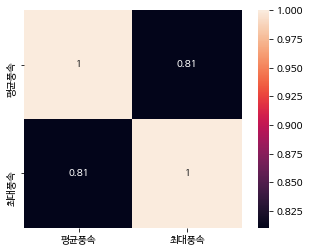

In [55]:
sns.heatmap(subway_train[['평균풍속','최대풍속']].corr(), annot=True, cbar=True, square=True, color='Red')

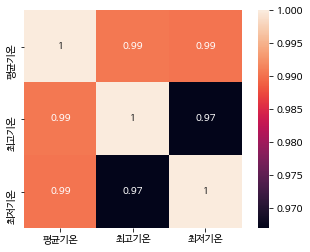

In [56]:
sns.heatmap(subway_train[['평균기온','최고기온', '최저기온']].corr(), annot=True, cbar=True, square=True, color='Red')

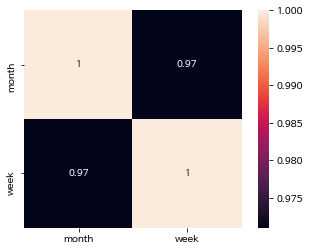

In [57]:
sns.heatmap(subway_train[['month','week']].corr(), annot=True, cbar=True, square=True, color='Red')

In [58]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['누적휴일'] == 0, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 2, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 3, '승차총승객수_log'],
                      subway_train.loc[subway_train['누적휴일'] == 4, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 5, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 6, '승차총승객수_log'],
                      subway_train.loc[subway_train['누적휴일'] == 7, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 8, '승차총승객수_log'], subway_train.loc[subway_train['누적휴일'] == 9, '승차총승객수_log'],
                      subway_train.loc[subway_train['누적휴일'] == 10, '승차총승객수_log'])

print_pval("누적휴일", pval)

변수 누적휴일, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [59]:
tstat, pval = ttest_ind(subway_train.loc[subway_train['명절여부'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['명절여부'] == 0, '승차총승객수_log'])

print_pval("명절여부", pval)

변수 명절여부, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [60]:
fstat ,pval = f_oneway(subway_train.loc[subway_train['환승노선'] == 1, '승차총승객수_log'], subway_train.loc[subway_train['환승노선'] == 2, '승차총승객수_log'], subway_train.loc[subway_train['환승노선'] == 3, '승차총승객수_log'])

print_pval("환승노선", pval)

변수 환승노선, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


## => 유의미하지 않던 Year변수는 분석 제외
## => 상관관계가 높은 변수 중 승차인원에 영향을 줄것이라 예상되는 최대풍속, 평균기온만을 사용

In [61]:
subway_total_pre =  subway_total_select.astype({'month':'str', 'day':'str', 'week':'str', '누적휴일':'str', '명절여부':'str', '환승노선':'str'})

subway_total_pre.drop(['사용일자', '날짜명', '최저기온', '최고기온', 'index', '평균풍속', 'week'], axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

num_columns = ['평균기온', '강수량', '최대풍속']

for col in num_columns:
    scaler = StandardScaler()
    
    subway_total_pre.loc[:, col] = scaler.fit_transform(np.array(subway_total_pre.loc[:, col]).reshape(-1,1))

In [63]:
subway_total_pre = subway_total_pre.sort_values(by='노선명')

In [64]:
from sklearn.preprocessing import LabelEncoder

cat_columns = [c for c, t in zip(subway_total_pre.dtypes.index, subway_total_pre.dtypes) if t == 'O']

le = LabelEncoder()

for col in cat_columns:
  subway_total_pre.loc[:, col] = le.fit_transform(subway_total_pre[col])

In [65]:
subway_total_pre['노선명'] = subway_total_pre['노선명'] + 1

In [66]:
subway_total_pre

,노선명,역명,승차총승객수,휴일여부,평균기온,강수량,최대풍속,year,month,day,date,누적휴일,명절여부,환승노선,승차총승객수_log
308777,1,287,28296.0,0,0.034650,-0.272244,-1.595552,2018,1,14,1,0,0,0,10.250511
282858,1,179,15201.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,1,9.629182
282859,1,268,29126.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,0,10.279421
282860,1,269,28728.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,2,10.265662
282861,1,270,19847.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,0,9.895859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476384,9,20,9107.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,2,9.116908
476385,9,138,1269.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,7.146772
476386,9,182,16558.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,9.714685
476375,9,40,2801.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,7.938089


In [67]:
subway_total_pre = pd.get_dummies(subway_total_pre)

# 학습데이터, 평가데이터로 분류
subway_train = subway_total_pre[(subway_total_pre['year'] == 2016) | (subway_total_pre['year'] == 2017) | (subway_total_pre['year'] == 2018)]

subway_test = subway_total_pre[(subway_total_pre['year'] == 2019)]

subway_experiment = subway_total_pre[(subway_total_pre['year'] == 2020)]


In [68]:
label_train = subway_train['승차총승객수_log']
subway_train = subway_train.drop(['year', '승차총승객수', '승차총승객수_log'], axis = 1)

label_test = subway_test['승차총승객수_log']
subway_test = subway_test.drop(['year', '승차총승객수', '승차총승객수_log'], axis = 1)

label_experiment = subway_experiment['승차총승객수_log']
subway_experiment = subway_experiment.drop(['year', '승차총승객수', '승차총승객수_log'], axis = 1)


label_train.reset_index(drop=True, inplace=True)
subway_train.reset_index(drop=True, inplace=True)
label_test.reset_index(drop=True, inplace=True)
subway_test.reset_index(drop=True, inplace=True)
label_experiment.reset_index(drop=True, inplace=True)
subway_experiment.reset_index(drop=True, inplace=True)

## 모델 선택을 위한 Hold-Out 검정

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [106]:
# 학습 / 검증데이터 분리
x_train, x_valid, y_train, y_valid = train_test_split(subway_train, label_train, test_size=0.2,
                                                      random_state=1015, shuffle=True)

In [87]:
def get_result(model, name):

    model.fit(x_train, y_train)

    pred = model.predict(x_valid)

    mae = mean_absolute_error(np.exp(y_valid), np.exp(pred))

    print("%s MAE : %f" %(name, mae))

    valid = pd.concat([x_valid, y_valid], axis=1)
    valid['pred'] = pred

    valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
    valid['pred_exp'] = np.exp(valid['pred'])

    v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

    v = v.reset_index()

    v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

    sns.barplot(v['노선명'], v['value'], hue = v['variable'])


In [88]:
print("학습 데이터 셋 크기 : {}".format(x_train.shape))
print("검증 데이터 셋 크기 : {}".format(x_valid.shape))

학습 데이터 셋 크기 : (263041, 12)
검증 데이터 셋 크기 : (65761, 12)


Linear Model MAE : 8771.664193


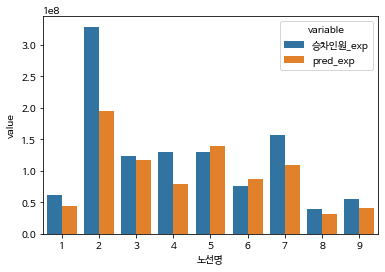

In [89]:
# linear model
get_result(LinearRegression(), "Linear Model")

Ridge Model MAE : 8771.664792


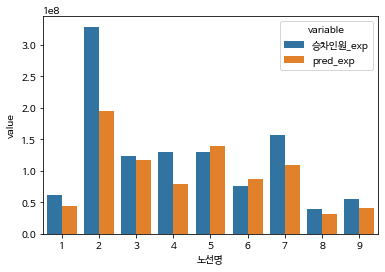

In [90]:
# Ridge Model
get_result(Ridge(), "Ridge Model")

Lasso Model MAE : 9767.533696


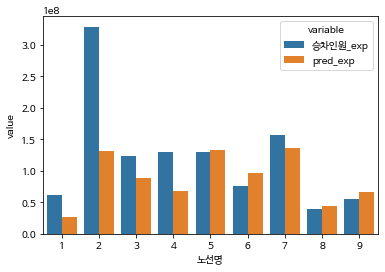

In [91]:
# Lasso Model
get_result(Lasso(), "Lasso Model")

[12:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Model MAE : 6226.203758


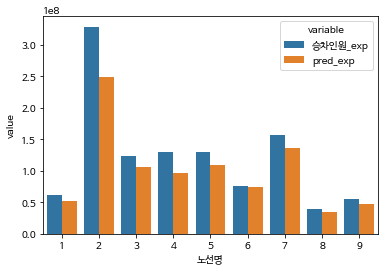

In [92]:
# XGBoost Model
get_result(XGBRegressor(n_jobs=-1, tree_method='gpu_hist'), "XGBoost Model")

LGBM Model MAE : 2714.552559


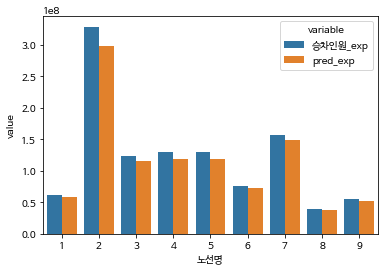

In [93]:
# LGBM Model
get_result(LGBMRegressor(n_jobs=-1, tree_method='gpu_hist'), "LGBM Model")

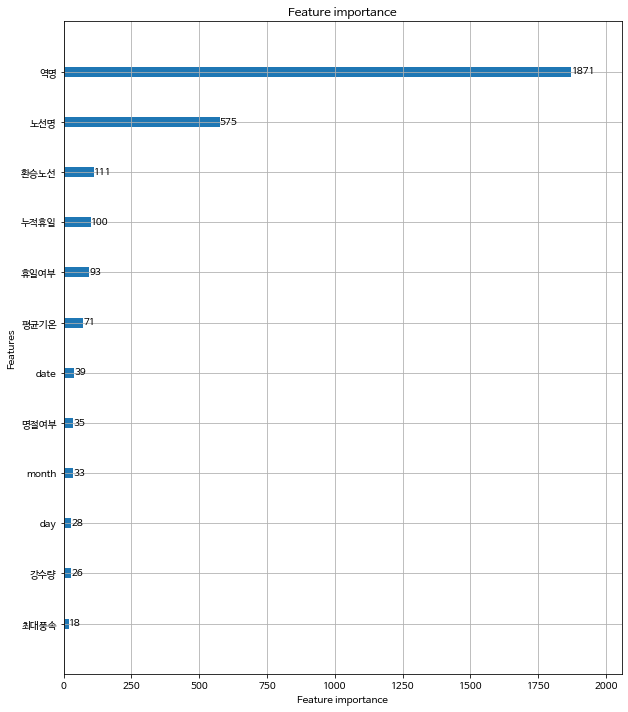

In [108]:
lgbm = LGBMRegressor(n_jobs=-1, tree_method='gpu_hist')

lgbm.fit(x_train, y_train)
pred = lgbm.predict(x_valid)

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm, ax=ax)

# 하이퍼 파라미터 튜닝

In [98]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate' : [0.001, 0.03, 0.01, 0.05, 0.1, 0.2],
          'max_depth': [3, 5, 7, 10]}

n_splits = 5

kf = KFold(n_splits = n_splits, shuffle=True, random_state=1110)

lgbm_grid = GridSearchCV(LGBMRegressor(tree_method='gpu_hist'), params, n_jobs=-1, scoring='neg_mean_absolute_error', cv=kf)

lgbm_grid.fit(subway_train, label_train)

Grid_cv = pd.DataFrame(lgbm_grid.best_params_, index=[0])

In [99]:
Grid_cv

,learning_rate,max_depth
0,0.2,10


LGBM Model MAE : 1696.925533


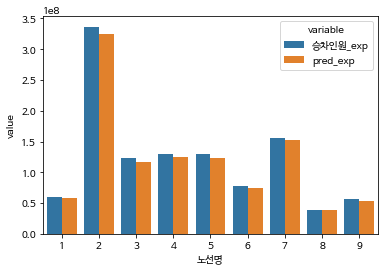

In [101]:
# LGBM Model
get_result(LGBMRegressor(n_jobs=-1,learning_rate = 0.2, max_depth=10, tree_method='gpu_hist'), "LGBM Model")

## 파라미터 튜닝 & 

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0653539	training's l2: 0.0160447	valid_1's l1: 0.068126	valid_1's l2: 0.0179418
[1000]	training's l1: 0.0572532	training's l2: 0.0139771	valid_1's l1: 0.0628083	valid_1's l2: 0.0184016
Early stopping, best iteration is:
[639]	training's l1: 0.0621205	training's l2: 0.0152753	valid_1's l1: 0.0656325	valid_1's l2: 0.0177873
1 folder validation score : 0.0656


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.05657	training's l2: 0.0084897	valid_1's l1: 0.0587999	valid_1's l2: 0.00951974
[1000]	training's l1: 0.0483648	training's l2: 0.00654139	valid_1's l1: 0.0526905	valid_1's l2: 0.008453
[1500]	training's l1: 0.04439	training's l2: 0.00560618	valid_1's l1: 0.0504836	valid_1's l2: 0.00813972
[2000]	training's l1: 0.0419392	training's l2: 0.00503365	valid_1's l1: 0.0495294	valid_1's l2: 0.00800201
[2500]	training's l1: 0.0400551	training's l2: 0.00459495	valid_1's l1

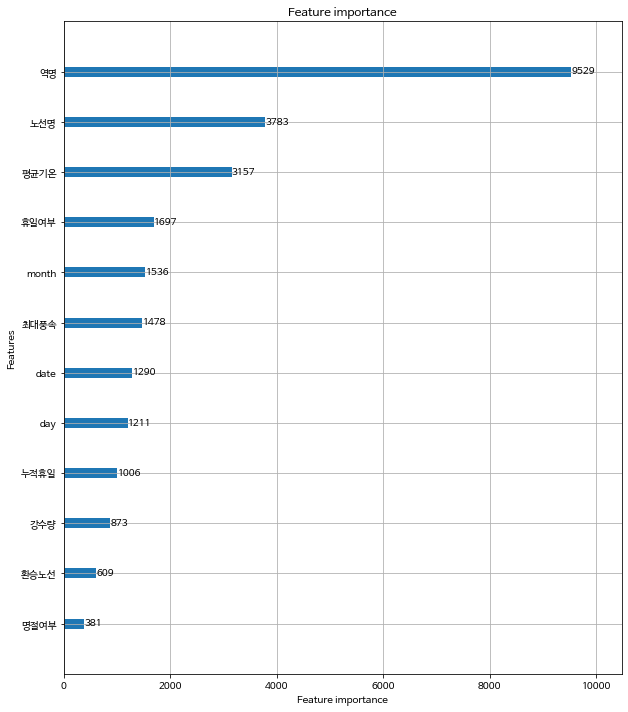

In [130]:
val_scores = []
oof_pred = np.zeros((subway_test.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)
    pred = model.predict(x_valid)

    df.append(valid)
    oof_pred += model.predict(subway_test) / n_splits
    val_mae = mean_absolute_error(y_valid, pred)

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(label_test, oof_pred)))

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax)

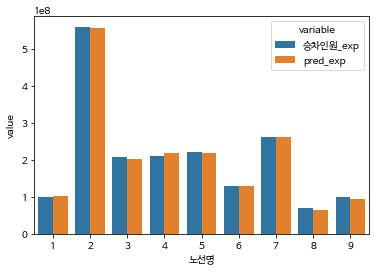

In [133]:
valid = pd.concat([subway_test, label_test], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

v = v.reset_index()

v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [134]:
print("2019년도 승차인원 예측 MAE : {:.4f}".format(mean_absolute_error(np.exp(label_test), np.exp(oof_pred))))

2019년도 승차인원 예측 MAE : 1111.7672


# => 약 1000명 정도의 차이로 승차인원 예측

In [151]:
subway_total_select[(subway_total_select['사용일자'] == '2019-10-15') & (subway_total_select['역명'] == "잠실(송파구청)")]

,사용일자,노선명,역명,승차총승객수,날짜명,휴일여부,평균기온,최고기온,최저기온,강수량,index,평균풍속,최대풍속,year,month,day,week,date,누적휴일,명절여부,환승노선,승차총승객수_log
416732,2019-10-15,2호선,잠실(송파구청),90377.0,평일,N,14.5,20.4,8.8,0.0,1383,1.6,4.3,2019,10,15,42,Tuesday,0,0,2,11.411756
416872,2019-10-15,8호선,잠실(송파구청),16203.0,평일,N,14.5,20.4,8.8,0.0,1383,1.6,4.3,2019,10,15,42,Tuesday,0,0,2,9.693013


In [152]:
subway_total_pre[subway_total_pre['승차총승객수'] == 90377]

,노선명,역명,승차총승객수,휴일여부,평균기온,강수량,최대풍속,year,month,day,date,누적휴일,명절여부,환승노선,승차총승객수_log
416732,2,259,90377.0,0,0.081216,-0.272244,-0.203027,2019,1,6,5,0,0,1,11.411756


In [155]:
subway_total_pre[(subway_total_pre['승차총승객수'] == 16203) & (subway_total_pre['역명'] == 259) & (subway_total_pre['month'] == 1)]

,노선명,역명,승차총승객수,휴일여부,평균기온,강수량,최대풍속,year,month,day,date,누적휴일,명절여부,환승노선,승차총승객수_log
416872,8,259,16203.0,0,0.081216,-0.272244,-0.203027,2019,1,6,5,0,0,1,9.693013


### 잠실역의 2019년 10월 15일 정보 추출

In [179]:
accurate_data = subway_total_pre.loc[[416732, 416872], :]

accurate_data = accurate_data.reset_index(drop=True)

accurate_label = accurate_data['승차총승객수_log']
accurate_feature = accurate_data.drop(['year', '승차총승객수', '승차총승객수_log'], axis=1)

# accurate_label = 

val_scores = []
oof_pred = np.zeros((accurate_label.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)
    pred = model.predict(x_valid)

    oof_pred += model.predict(accurate_feature) / n_splits
    val_mae = mean_absolute_error(y_valid, pred)

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("2019년 10월 15일 잠실역 승차인원 예측 (With accurate data) : %f" %mean_squared_error(np.expm1(accurate_label), np.expm1(oof_pred)))

valid = pd.concat([accurate_feature, accurate_label], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

jamsil = pd.DataFrame(valid[['승차인원_exp', 'pred_exp']].sum())
jamsil.index = ['실제', '예측']
jamsil.columns = ['승차인원']

jamsil['승차인원'] = np.round(jamsil['승차인원'], 2)

jamsil

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0653539	training's l2: 0.0160447	valid_1's l1: 0.068126	valid_1's l2: 0.0179418
[1000]	training's l1: 0.0572532	training's l2: 0.0139771	valid_1's l1: 0.0628083	valid_1's l2: 0.0184016
Early stopping, best iteration is:
[639]	training's l1: 0.0621205	training's l2: 0.0152753	valid_1's l1: 0.0656325	valid_1's l2: 0.0177873
1 folder validation score : 0.0656


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.05657	training's l2: 0.0084897	valid_1's l1: 0.0587999	valid_1's l2: 0.00951974
[1000]	training's l1: 0.0483648	training's l2: 0.00654139	valid_1's l1: 0.0526905	valid_1's l2: 0.008453
[1500]	training's l1: 0.04439	training's l2: 0.00560618	valid_1's l1: 0.0504836	valid_1's l2: 0.00813972
[2000]	training's l1: 0.0419392	training's l2: 0.00503365	valid_1's l1: 0.0495294	valid_1's l2: 0.00800201
[2500]	training's l1: 0.0400551	training's l2: 0.00459495	valid_1's l1

,승차인원
실제,106582.00
예측,107510.36


In [178]:
accurate_feature['평균기온'] = 0.074
accurate_feature['강수량'] = - 0.05
accurate_feature['최대풍속'] = 0.01

val_scores = []
oof_pred = np.zeros((accurate_label.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)
    pred = model.predict(x_valid)

    oof_pred += model.predict(accurate_feature) / n_splits
    val_mae = mean_absolute_error(y_valid, pred)

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("2019년 10월 15일 잠실역 승차인원 예측 (With accurate data) : %f" %mean_squared_error(np.expm1(accurate_label), np.expm1(oof_pred)))

valid = pd.concat([accurate_feature, accurate_label], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

jamsil = pd.DataFrame(valid[['승차인원_exp', 'pred_exp']].sum())
jamsil.index = ['실제', '예측']
jamsil.columns = ['승차인원']

jamsil['승차인원'] = np.round(jamsil['승차인원'], 2)

jamsil

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0653539	training's l2: 0.0160447	valid_1's l1: 0.068126	valid_1's l2: 0.0179418
[1000]	training's l1: 0.0572532	training's l2: 0.0139771	valid_1's l1: 0.0628083	valid_1's l2: 0.0184016
Early stopping, best iteration is:
[639]	training's l1: 0.0621205	training's l2: 0.0152753	valid_1's l1: 0.0656325	valid_1's l2: 0.0177873
1 folder validation score : 0.0656


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.05657	training's l2: 0.0084897	valid_1's l1: 0.0587999	valid_1's l2: 0.00951974
[1000]	training's l1: 0.0483648	training's l2: 0.00654139	valid_1's l1: 0.0526905	valid_1's l2: 0.008453
[1500]	training's l1: 0.04439	training's l2: 0.00560618	valid_1's l1: 0.0504836	valid_1's l2: 0.00813972
[2000]	training's l1: 0.0419392	training's l2: 0.00503365	valid_1's l1: 0.0495294	valid_1's l2: 0.00800201
[2500]	training's l1: 0.0400551	training's l2: 0.00459495	valid_1's l1

,승차인원
실제,106582.00
예측,105360.97


# 코로나19 이후 지하철 승차인원?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

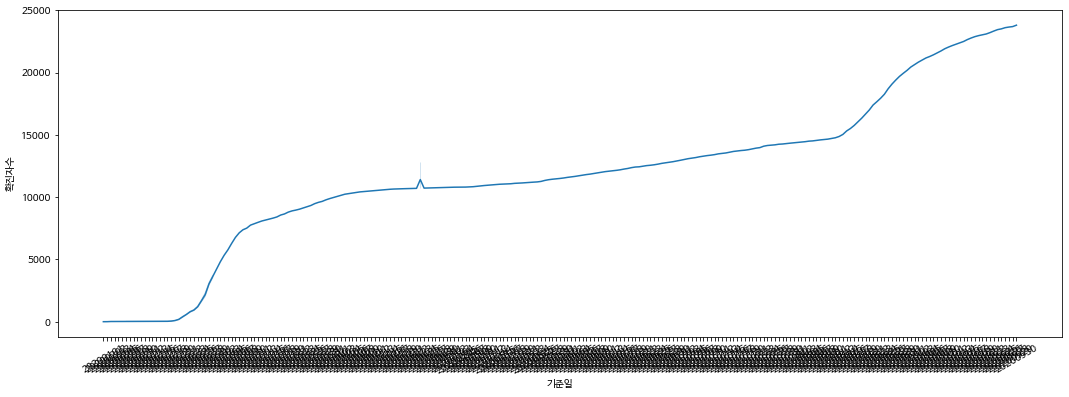

In [115]:
covid_table = pd.read_csv('covid_table.csv')

covid_table = covid_table[['decideCnt', 'stateDt']]

covid_table.columns = ['확진자수', '기준일']

covid_table.loc[274, '확진자수'] = 16

covid_table['기준일'] = covid_table['기준일'].astype("str")
# covid_table['기준일'] = [x[:-2] for x in covid_table['기준일']]
covid_table = covid_table.sort_values(by='기준일')

plt.figure(figsize=(18,6))

sns.lineplot(covid_table['기준일'], covid_table['확진자수'])

plt.xticks(rotation=30)

## 누적확진자 수에 뾰족 튀어나온 부분이 있음

In [116]:
covid_table

,확진자수,기준일
277,0,20200101
276,2,20200202
275,15,20200203
274,16,20200204
272,19,20200205
...,...,...
4,23611,20200927
3,23661,20200928
2,23699,20200929
1,23812,20200930


## 데이터를 살펴보니 중복된 값이 있어서 제거해주기로 결정.

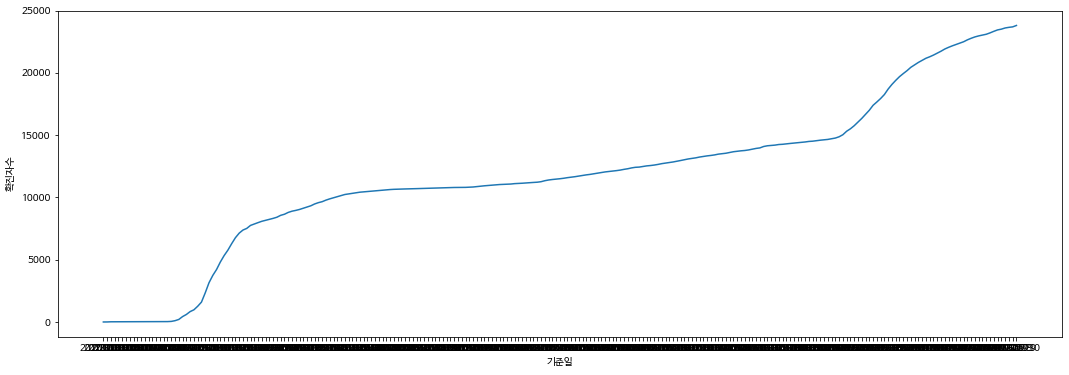

In [117]:
covid_table = covid_table.drop_duplicates()
covid_table.reset_index(drop=True, inplace=True)

covid_table.drop_duplicates('기준일', keep='last', inplace = True)
plt.figure(figsize=(18,6))

sns.lineplot(covid_table['기준일'], covid_table['확진자수'])

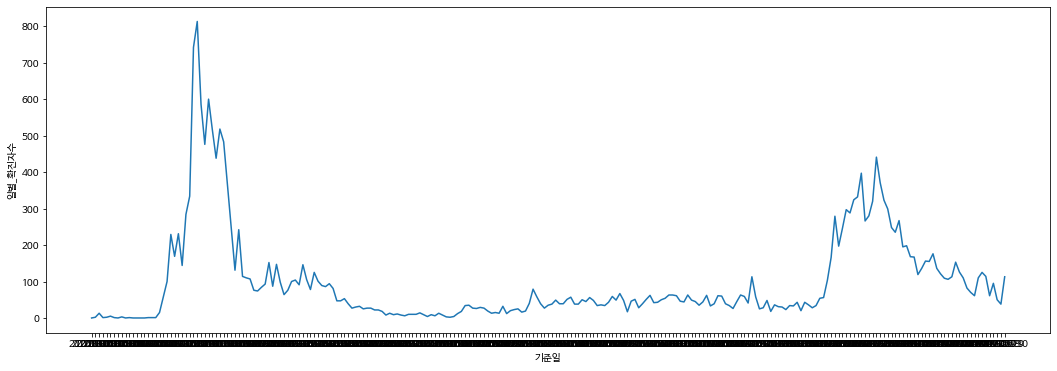

In [118]:
diff = covid_table['확진자수'].diff()
diff.fillna(0, inplace=True)
covid_table['일별_확진자수'] = diff

plt.figure(figsize=(18,6))

sns.lineplot(covid_table['기준일'], covid_table['일별_확진자수'])

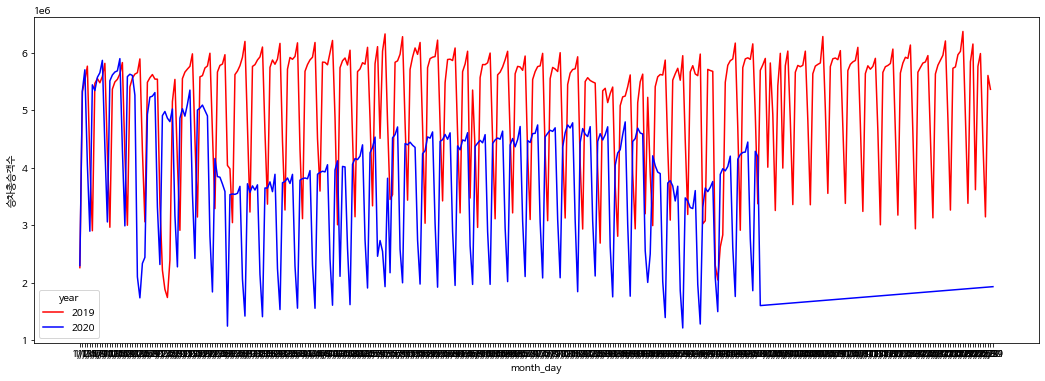

In [180]:
subway_total_select = subway_total_select.drop_duplicates()
s_total = subway_total_select.pivot_table(index=['사용일자', 'year', 'month', 'day'], values = '승차총승객수', aggfunc='sum')
s_total.reset_index(inplace=True)
s_total = s_total.drop(s_total[s_total['year'] == 2016].index, axis = 0)
s_total = s_total.drop(s_total[s_total['year'] == 2017].index, axis = 0)
s_total = s_total.drop(s_total[s_total['year'] == 2018].index, axis = 0)

s_total = s_total.astype({"month":"str", "day":"str"})

s_total['month_day'] = s_total['month'] + "/" + s_total['day']

plt.figure(figsize=(18,6))

sns.lineplot(s_total['month_day'], s_total['승차총승객수'], hue=s_total['year'], palette=['r','b'])

## 2019년도에 비해 2020년도의 지하철 승차인원의 엄청난 감소양상

In [181]:
subway_experiment['승차총승객수_log'] = label_experiment
subway_2020_09 = subway_experiment[subway_experiment['month'] == 9]

label_2020_09 = subway_2020_09['승차총승객수_log']
subway_2020_09 = subway_2020_09.drop(['승차총승객수_log'], axis=1)

label_2020_09.reset_index(drop=True, inplace=True)
subway_2020_09.reset_index(drop=True, inplace=True)

## 2016~2018 기존 설계 모델로 2020년도 9월 데이터 예측

In [182]:
val_scores = []
oof_pred = np.zeros((label_2020_09.shape[0], ))
df = pd.DataFrame()

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 500, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)

    pred = model.predict(x_valid)


    valid = pd.concat([x_valid, y_valid], axis=1)
    valid['pred'] = pred

    oof_pred += model.predict(subway_2020_09) / n_splits
    val_mae = mean_absolute_error(y_valid, pred)

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(label_2020_09, oof_pred)))

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0653539	training's l2: 0.0160447	valid_1's l1: 0.068126	valid_1's l2: 0.0179418
[1000]	training's l1: 0.0572532	training's l2: 0.0139771	valid_1's l1: 0.0628083	valid_1's l2: 0.0184016
Early stopping, best iteration is:
[639]	training's l1: 0.0621205	training's l2: 0.0152753	valid_1's l1: 0.0656325	valid_1's l2: 0.0177873
1 folder validation score : 0.0656


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.05657	training's l2: 0.0084897	valid_1's l1: 0.0587999	valid_1's l2: 0.00951974
[1000]	training's l1: 0.0483648	training's l2: 0.00654139	valid_1's l1: 0.0526905	valid_1's l2: 0.008453
[1500]	training's l1: 0.04439	training's l2: 0.00560618	valid_1's l1: 0.0504836	valid_1's l2: 0.00813972
[2000]	training's l1: 0.0419392	training's l2: 0.00503365	valid_1's l1: 0.0495294	valid_1's l2: 0.00800201
[2500]	training's l1: 0.0400551	training's l2: 0.00459495	valid_1's l1

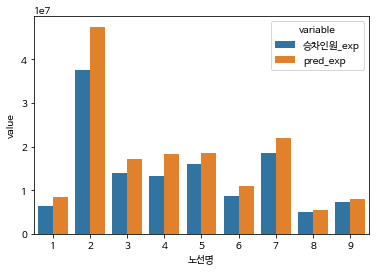

In [183]:
valid = pd.concat([subway_2020_09, label_2020_09], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

v = v.reset_index()

v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [184]:
print("2020년도 9월 승차인원 예측 MAE : {:.4f}".format(mean_absolute_error(np.exp(label_2020_09), np.exp(oof_pred))))

2020년도 9월 승차인원 예측 MAE : 3448.9860


## 기존 모델의 성능이 약 1000임을 감안할때 MAE 6300은 엄청난 성능 하락

## => 코로나19로 인한 승차객 감소현상을 모델이 반영하고 있지 못함

## => 이를 보완해주고자 20년도 1월~8월의 승차객 데이터로 9월의 승차객을 예측하고자함.

In [227]:
subway_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82308 entries, 440152 to 522755
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사용일자        82308 non-null  datetime64[ns]
 1   노선명         82308 non-null  object        
 2   역명          82308 non-null  object        
 3   승차총승객수      82308 non-null  float64       
 4   날짜명         82308 non-null  object        
 5   휴일여부        82308 non-null  object        
 6   평균기온        82308 non-null  float64       
 7   최고기온        82308 non-null  float64       
 8   최저기온        82308 non-null  float64       
 9   강수량         82308 non-null  float64       
 10  index       82308 non-null  int64         
 11  평균풍속        82308 non-null  float64       
 12  최대풍속        82308 non-null  float64       
 13  year        82308 non-null  int64         
 14  month       82308 non-null  int64         
 15  day         82308 non-null  int64         
 16  week        8230

In [233]:
def get_2020_dataset(df):
  df.drop(['year', '사용일자', '날짜명', '최저기온', '최고기온', 'index', '평균풍속', 'week', '승차총승객수'], axis=1, inplace=True)

  num_columns = ['평균기온', '강수량', '최대풍속']

  for col in num_columns:
    scaler = StandardScaler()
    
    df.loc[:, col] = scaler.fit_transform(np.array(df.loc[:, col]).reshape(-1,1))

  df = df.sort_values(by='노선명')

  cat_columns = [c for c, t in zip(df.dtypes.index, df.dtypes) if t == 'O']

  le = LabelEncoder()

  for col in cat_columns:
    df.loc[:, col] = le.fit_transform(df[col])

  df['노선명'] = df['노선명'] + 1
  
  df = df.reset_index(drop=True)

  df_2020_train = df[df['month'] != 9]
  df_2020_train_label = df_2020_train['승차총승객수_log']
  df_2020_train = df_2020_train.drop("승차총승객수_log", axis=1)

  df_2020_test = df[df['month'] == 9]
  df_2020_test_label = df_2020_test['승차총승객수_log']
  df_2020_test = df_2020_test.drop("승차총승객수_log", axis=1)

  return df_2020_train, df_2020_train_label, df_2020_test, df_2020_test_label

In [247]:
subway_20 = subway_total_select[subway_total_select['year'] == 2020]

In [248]:
subway_2020_train,subway_2020_train_label,subway_2020_test,subway_2020_test_label = get_2020_dataset(subway_20)

subway_2020_train = subway_2020_train.reset_index(drop=True)
subway_2020_train_label = subway_2020_train_label.reset_index(drop=True)
subway_2020_test = subway_2020_test.reset_index(drop=True)
subway_2020_test_label = subway_2020_test_label.reset_index(drop=True)

# 2020년 9월 승차인원 예측(Without 코로나 데이터)

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0405671	training's l2: 0.00475388	valid_1's l1: 0.0480515	valid_1's l2: 0.0075038
[1000]	training's l1: 0.0318081	training's l2: 0.00342618	valid_1's l1: 0.0430291	valid_1's l2: 0.00732505
Early stopping, best iteration is:
[879]	training's l1: 0.0331168	training's l2: 0.00363899	valid_1's l1: 0.0434563	valid_1's l2: 0.00721416
1 folder validation score : 0.0435


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0405567	training's l2: 0.00376994	valid_1's l1: 0.046165	valid_1's l2: 0.00550693
[1000]	training's l1: 0.0302374	training's l2: 0.00228028	valid_1's l1: 0.0393742	valid_1's l2: 0.0044819
[1500]	training's l1: 0.0262708	training's l2: 0.00178204	valid_1's l1: 0.0378767	valid_1's l2: 0.00432275
[2000]	training's l1: 0.0236952	training's l2: 0.00146473	valid_1's l1: 0.0371601	valid_1's l2: 0.00422569
[2500]	training's l1: 0.0218443	training's l2: 0.00126414	v

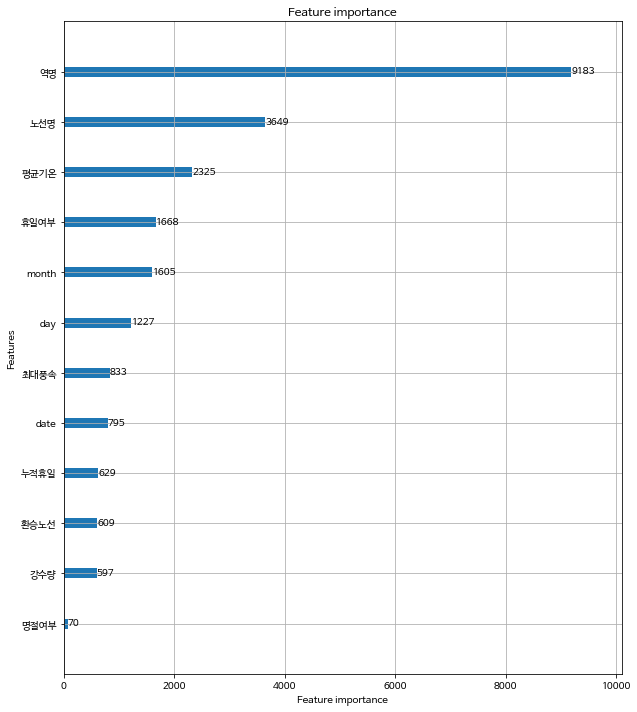

In [241]:
val_scores = []
oof_pred = np.zeros((subway_2020_test_label.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_2020_train, subway_2020_train_label)):
    x_train, x_valid = subway_2020_train.iloc[trn_idx], subway_2020_train.iloc[val_idx]
    y_train, y_valid = subway_2020_train_label.iloc[trn_idx], subway_2020_train_label[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 500, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)

    oof_pred += model.predict(subway_2020_test) / n_splits
    val_mae = mean_absolute_error(y_valid, model.predict(x_valid))

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(subway_2020_test_label, oof_pred)))

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax)

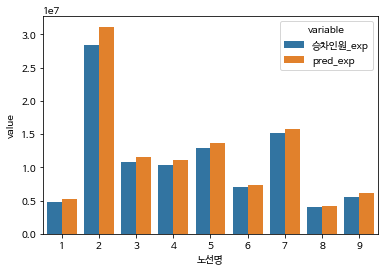

In [242]:
valid = pd.concat([subway_2020_test, subway_2020_test_label], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

v = v.reset_index()

v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [243]:
print("2020년도 9월 승차인원 예측 MAE : {:.4f}".format(mean_absolute_error(np.exp(subway_2020_test_label), np.exp(oof_pred))))

2020년도 9월 승차인원 예측 MAE : 1940.8355


## 코로나 데이터를 학습하지 않고 데이터를 학습시킨 결과, MAE 값은 약 1940으로 실제 승차인원과 약 1940명 차이나는 값으로 예측

In [254]:
subway_20 = subway_total_select[subway_total_select['year'] == 2020]

covid_table['기준일'] = pd.to_datetime(covid_table['기준일'])

subway_20_covid = subway_20.merge(covid_table, how='left', left_on = '사용일자', right_on='기준일')

subway_20_covid['확진자수'] = subway_20_covid['확진자수'].fillna(method='ffill')
subway_20_covid['일별_확진자수'] = subway_20_covid['일별_확진자수'].fillna(0)

subway_20_covid = subway_20_covid.drop("기준일", axis=1)

subway_2020_train_covid,subway_2020_train_label_covid,subway_2020_test_covid,subway_2020_test_label_covid = get_2020_dataset(subway_20_covid)

subway_2020_train_covid = subway_2020_train_covid.reset_index(drop=True)
subway_2020_train_label_covid = subway_2020_train_label_covid.reset_index(drop=True)
subway_2020_test_covid = subway_2020_test_covid.reset_index(drop=True)
subway_2020_test_label_covid = subway_2020_test_label_covid.reset_index(drop=True)

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0417216	training's l2: 0.00491196	valid_1's l1: 0.049585	valid_1's l2: 0.00758448
[1000]	training's l1: 0.0313822	training's l2: 0.00335284	valid_1's l1: 0.0431346	valid_1's l2: 0.00732943
Early stopping, best iteration is:
[833]	training's l1: 0.0337798	training's l2: 0.00371369	valid_1's l1: 0.0442728	valid_1's l2: 0.00720966
1 folder validation score : 0.0443


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0396706	training's l2: 0.00363922	valid_1's l1: 0.0461237	valid_1's l2: 0.0053923
[1000]	training's l1: 0.0299894	training's l2: 0.00225713	valid_1's l1: 0.0397995	valid_1's l2: 0.00445357
[1500]	training's l1: 0.0255259	training's l2: 0.00169069	valid_1's l1: 0.0377355	valid_1's l2: 0.0041958
[2000]	training's l1: 0.0227328	training's l2: 0.00136783	valid_1's l1: 0.0368079	valid_1's l2: 0.00410189
[2500]	training's l1: 0.0207388	training's l2: 0.0011639	va

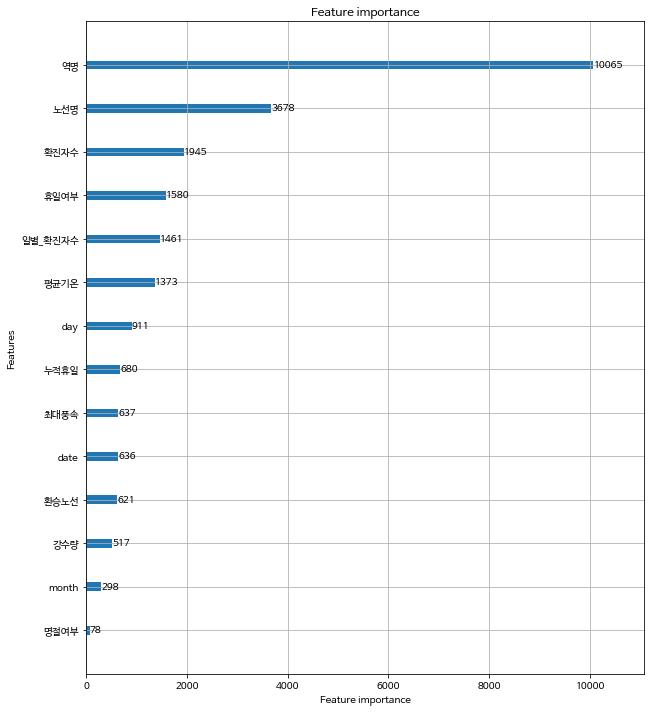

In [255]:
val_scores = []
oof_pred = np.zeros((subway_2020_test_label_covid.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_2020_train_covid, subway_2020_train_label_covid)):
    x_train, x_valid = subway_2020_train_covid.iloc[trn_idx], subway_2020_train_covid.iloc[val_idx]
    y_train, y_valid = subway_2020_train_label_covid.iloc[trn_idx], subway_2020_train_label_covid[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 500, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)

    oof_pred += model.predict(subway_2020_test_covid) / n_splits
    val_mae = mean_absolute_error(y_valid, model.predict(x_valid))

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(subway_2020_test_label_covid, oof_pred)))

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax)

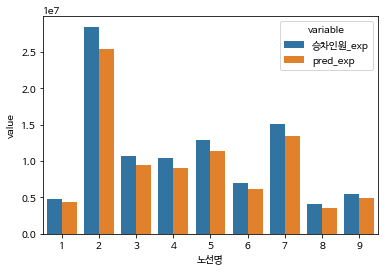

In [257]:
valid = pd.concat([subway_2020_test_covid, subway_2020_test_label_covid], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

v = v.reset_index()

v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [258]:
print("2020년도 9월 승차인원 예측 (With Covid Data) MAE : {:.4f}".format(mean_absolute_error(np.exp(subway_2020_test_label_covid), np.exp(oof_pred))))

2020년도 9월 승차인원 예측 (With Covid Data) MAE : 1455.7566


## 코로나 데이터를 학습시킨 모델의 MAE는 약 1450정도로 엄청난 성능 향상을 가져옴

In [260]:
covid_table['shift_7_days'] = covid_table['일별_확진자수'].shift(7)

subway_20_covid2 = subway_20.merge(covid_table, how='left', left_on = '사용일자', right_on='기준일')

subway_20_covid2['확진자수'] = subway_20_covid2['확진자수'].fillna(method='ffill')
subway_20_covid2['일별_확진자수'] = subway_20_covid2['일별_확진자수'].fillna(0)
subway_20_covid2['shift_7_days'] = subway_20_covid2['shift_7_days'].fillna(0)

subway_20_covid2 = subway_20_covid2.drop("기준일", axis=1)

subway_2020_train_covid2,subway_2020_train_label_covid2,subway_2020_test_covid2,subway_2020_test_label_covid2 = get_2020_dataset(subway_20_covid2)

subway_2020_train_covid2 = subway_2020_train_covid2.reset_index(drop=True)
subway_2020_train_label_covid2 = subway_2020_train_label_covid2.reset_index(drop=True)
subway_2020_test_covid2 = subway_2020_test_covid2.reset_index(drop=True)
subway_2020_test_label_covid2 = subway_2020_test_label_covid2.reset_index(drop=True)

Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0435305	training's l2: 0.00513908	valid_1's l1: 0.0521028	valid_1's l2: 0.00810885
[1000]	training's l1: 0.032794	training's l2: 0.00349079	valid_1's l1: 0.0452078	valid_1's l2: 0.00754967
Early stopping, best iteration is:
[785]	training's l1: 0.0357787	training's l2: 0.00395625	valid_1's l1: 0.0466	valid_1's l2: 0.00747913
1 folder validation score : 0.0466


Training until validation scores don't improve for 500 rounds.
[500]	training's l1: 0.0402307	training's l2: 0.0036865	valid_1's l1: 0.0472907	valid_1's l2: 0.0056434
[1000]	training's l1: 0.0296922	training's l2: 0.00220634	valid_1's l1: 0.040189	valid_1's l2: 0.00461303
[1500]	training's l1: 0.0254053	training's l2: 0.00166715	valid_1's l1: 0.038211	valid_1's l2: 0.00437778
[2000]	training's l1: 0.0226714	training's l2: 0.00136536	valid_1's l1: 0.0373291	valid_1's l2: 0.00427475
[2500]	training's l1: 0.0205799	training's l2: 0.00114738	valid_

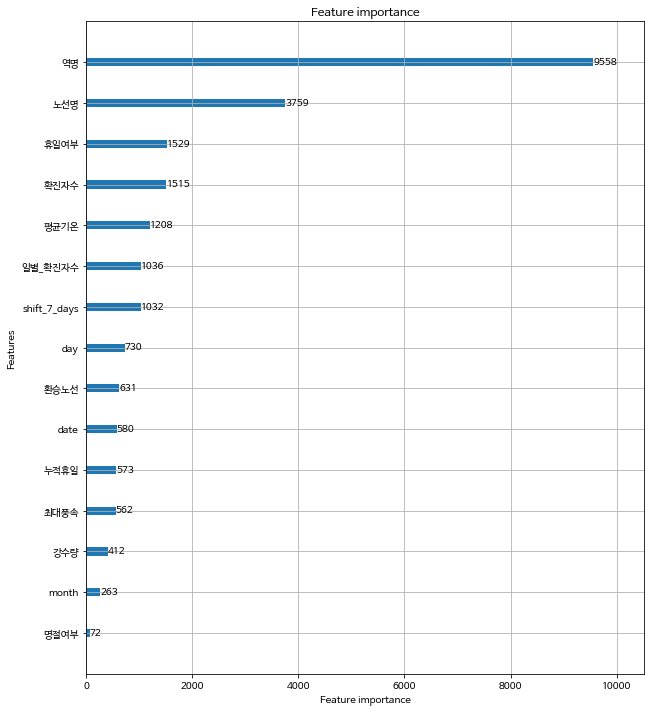

In [261]:
val_scores = []
oof_pred = np.zeros((subway_2020_test_label_covid2.shape[0], ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_2020_train_covid2, subway_2020_train_label_covid2)):
    x_train, x_valid = subway_2020_train_covid2.iloc[trn_idx], subway_2020_train_covid2.iloc[val_idx]
    y_train, y_valid = subway_2020_train_label_covid2.iloc[trn_idx], subway_2020_train_label_covid2[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 500, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)

    oof_pred += model.predict(subway_2020_test_covid2) / n_splits
    val_mae = mean_absolute_error(y_valid, model.predict(x_valid))

    val_scores.append(val_mae)

    print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(subway_2020_test_label_covid2, oof_pred)))

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax)

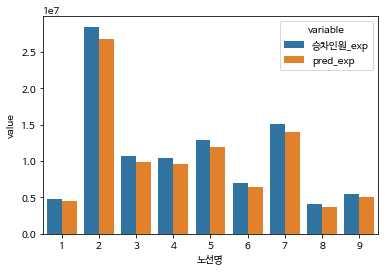

In [262]:
valid = pd.concat([subway_2020_test_covid2, subway_2020_test_label_covid2], axis=1)

valid['pred'] = oof_pred

valid['승차인원_exp'] = np.exp(valid['승차총승객수_log'])
valid['pred_exp'] = np.exp(valid['pred'])

v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

v = v.reset_index()

v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [263]:
print("2020년도 9월 승차인원 예측 (With Covid Data + 일주일 전 확진자 데이터) MAE : {:.4f}".format(mean_absolute_error(np.exp(subway_2020_test_label_covid2), np.exp(oof_pred))))

2020년도 9월 승차인원 예측 (With Covid Data + 일주일 전 확진자 데이터) MAE : 1036.3153


## 일주일 전의 확진자 데이터를 학습시킨 모델의 MAE는 약 1000으로 예측성능이 굉장히 향상!

In [264]:
subway_total_pre

,노선명,역명,승차총승객수,휴일여부,평균기온,강수량,최대풍속,year,month,day,date,누적휴일,명절여부,환승노선,승차총승객수_log
308777,1,287,28296.0,0,0.034650,-0.272244,-1.595552,2018,1,14,1,0,0,0,10.250511
282858,1,179,15201.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,1,9.629182
282859,1,268,29126.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,0,10.279421
282860,1,269,28728.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,2,10.265662
282861,1,270,19847.0,1,1.478218,0.328971,-0.776419,2018,9,20,2,1,0,0,9.895859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476384,9,20,9107.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,2,9.116908
476385,9,138,1269.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,7.146772
476386,9,182,16558.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,9.714685
476375,9,40,2801.0,1,0.323363,-0.272244,1.107585,2020,6,23,4,1,0,0,7.938089


In [265]:
subway_total_pre.describe()

,노선명,역명,승차총승객수,휴일여부,평균기온,강수량,최대풍속,year,month,day,date,누적휴일,명절여부,환승노선,승차총승객수_log
count,520610.000000,520610.000000,520610.000000,520610.000000,5.206100e+05,5.206100e+05,5.206100e+05,520610.000000,520610.000000,520610.000000,520610.000000,520610.000000,520610.000000,520610.000000,520610.000000
mean,5.026653,156.765508,16158.036123,0.322764,-2.615782e-16,1.823595e-14,2.111770e-16,2017.894385,5.683433,14.841982,2.999422,0.697386,0.027087,0.279945,9.348408
std,2.281421,91.032001,14729.559297,0.467534,1.000001e+00,1.000001e+00,1.000001e+00,1.373147,3.449799,8.948887,2.000434,1.247472,0.162338,0.511433,0.853744
min,1.000000,0.000000,60.000000,0.000000,-2.647593e+00,-2.722442e-01,-2.414684e+00,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.110874
25%,3.000000,80.000000,6754.000000,0.000000,-8.501180e-01,-2.722442e-01,-6.945061e-01,2017.000000,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,8.818038
50%,5.000000,157.000000,11844.000000,0.000000,1.184697e-01,-2.722442e-01,-1.211135e-01,2018.000000,6.000000,15.000000,3.000000,0.000000,0.000000,0.000000,9.379661
75%,7.000000,236.000000,20264.000000,1.000000,8.821638e-01,-2.481956e-01,6.161056e-01,2019.000000,9.000000,22.000000,5.000000,1.000000,0.000000,0.000000,9.916651
max,9.000000,315.000000,152285.000000,1.000000,1.869378e+00,1.131117e+01,5.940466e+00,2020.000000,11.000000,30.000000,6.000000,10.000000,1.000000,2.000000,11.933516


In [266]:
subway_2020_test_covid2

,노선명,역명,휴일여부,평균기온,강수량,최대풍속,month,day,date,누적휴일,명절여부,환승노선,확진자수,일별_확진자수,shift_7_days
0,1,73,1,0.537596,-0.351505,-0.824526,9,27,3,2,0,2,23611.0,95.0,82.0
1,1,137,1,0.537596,-0.351505,-0.824526,9,27,3,2,0,2,23611.0,95.0,82.0
2,1,137,0,0.852809,-0.351505,1.591655,9,8,5,0,0,2,21432.0,136.0,235.0
3,1,73,0,0.852809,-0.351505,1.591655,9,8,5,0,0,2,21432.0,136.0,235.0
4,1,228,0,0.852809,-0.351505,1.591655,9,8,5,0,0,1,21432.0,136.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,9,50,0,0.611146,-0.269580,2.059303,9,9,6,0,0,1,21588.0,156.0,267.0
9056,9,134,0,0.611146,-0.269580,2.059303,9,9,6,0,0,1,21588.0,156.0,267.0
9057,9,190,0,0.611146,-0.269580,2.059303,9,9,6,0,0,2,21588.0,156.0,267.0
9058,9,164,0,0.611146,-0.269580,2.059303,9,9,6,0,0,1,21588.0,156.0,267.0


In [267]:
subway_2020_test_label_covid2

0        9.325810
1        9.727705
2       10.335335
3        8.875147
4       10.188892
          ...    
9055     9.769385
9056     8.364508
9057     9.846441
9058     7.686162
9059     8.606119
Name: 승차총승객수_log, Length: 9060, dtype: float64